<div align="center" style="line-height: 1.2;">

### **BCSE417P Lab Assignment 1**

#### **Name**: Akshat Omar

#### **Reg No**: 21BAI1792

##### **Aug 16, 2024**

##### By turning in this assignment, I agree and declare that all of this is my own work.

</div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1A
## Task 1: Basic Image Statistics and Color Space Conversion
**Objective:**
Compute basic statistics and convert an image into different color spaces.


Mean for Blue channel: 94.27
Mean for Green channel: 117.13
Mean for Red channel: 120.37
Standard Deviation for Blue channel: 38.92
Standard Deviation for Green channel: 38.87
Standard Deviation for Red channel: 37.49


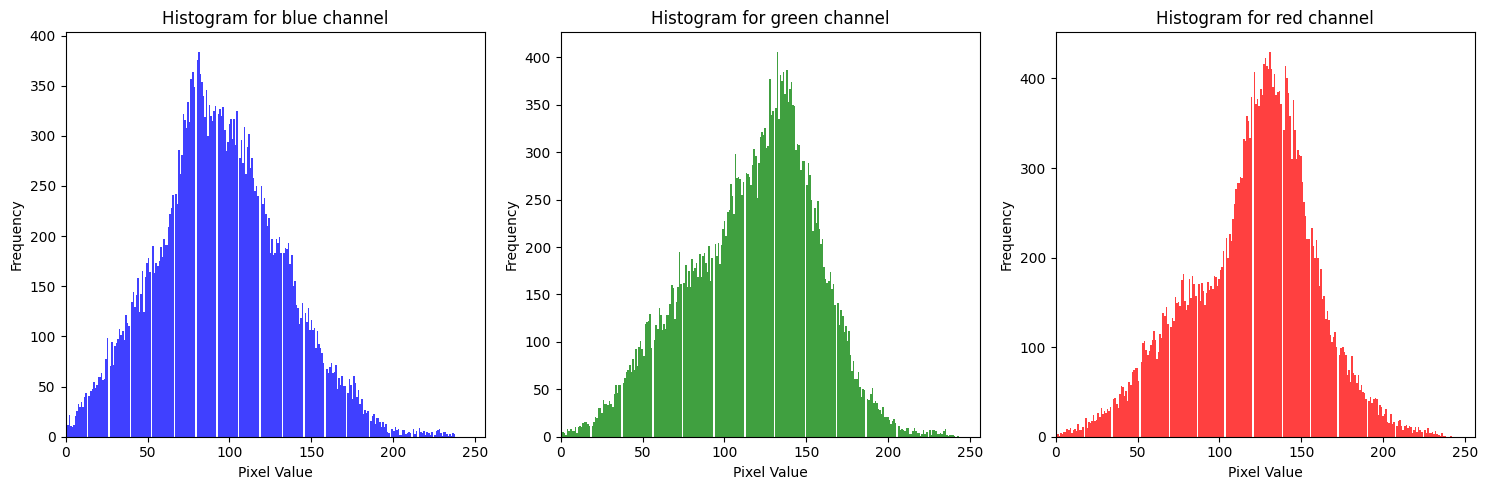

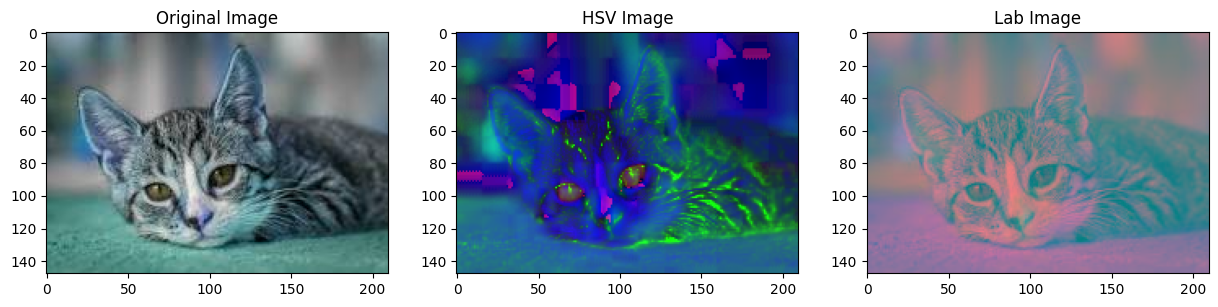

In [ ]:
# Step 1: Read the Image
image = cv2.imread('cat.jpeg')

# Step 2: Compute Basic Statistics
means, std_devs = cv2.meanStdDev(image)
means = means.flatten()
std_devs = std_devs.flatten()

print(f"Mean for Blue channel: {means[0]:.2f}")
print(f"Mean for Green channel: {means[1]:.2f}")
print(f"Mean for Red channel: {means[2]:.2f}")

print(f"Standard Deviation for Blue channel: {std_devs[0]:.2f}")
print(f"Standard Deviation for Green channel: {std_devs[1]:.2f}")
print(f"Standard Deviation for Red channel: {std_devs[2]:.2f}")

# Step 3: Calculate and plot histograms for each color channel separately using plt.hist
colors = ('blue', 'green', 'red')
channels = cv2.split(image)
plt.figure(figsize=(15, 5))

for i, (channel, color) in enumerate(zip(channels, colors)):
    plt.subplot(1, 3, i + 1)
    plt.hist(channel.ravel(), bins=256, color=color, alpha=0.75)
    plt.title(f'Histogram for {color} channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

# Step 4: Convert Color Spaces
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Display the images without converting to RGB
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(image_hsv)
plt.title('HSV Image')
plt.subplot(1, 3, 3)
plt.imshow(image_lab)
plt.title('Lab Image')
plt.show()


## Basic Statistics:
Analyzing fundamental statistics such as the mean, standard deviation, minimum, and maximum values for each color channel (R, G, B) offers a deeper insight into the characteristics of an image.

- #### Mean (Average Intensity):
The mean indicates the average pixel intensity for each color channel.
Inference: A higher mean value for a channel suggests that channel is generally brighter. For instance, if the Red channel has a significantly higher mean compared to the Green and Blue channels, the image might exhibit a reddish tone.

- #### Standard Deviation (Contrast/Spread):
The standard deviation measures how pixel intensities deviate from the mean. A high standard deviation signifies a wide range of intensities and thus higher contrast, while a low standard deviation indicates less contrast.
Inference: Channels with a low standard deviation may appear flat or dull, while channels with a high standard deviation show strong contrast and more variation in intensity.

- #### Minimum and Maximum Values:
The minimum and maximum values indicate the darkest and brightest pixel intensities in each channel.
Inference: The range between these values reflects the image's dynamic range. If the minimum value is significantly above 0 or the maximum value is far from 255, it suggests that the image might not be fully exploiting the available intensity range, potentially leading to a less dynamic appearance.

## Histogram of an RGB Image
Color Channel Histograms: The histogram for an RGB image can be separately computed for the Red, Green, and Blue channels. Each histogram depicts the frequency of pixel intensities (ranging from 0 to 255) for that channel.

- #### Intensity Distribution:
The histogram illustrates the distribution of pixel intensities in each channel. A histogram that is spread out over a broad range of intensities typically indicates better contrast. Conversely, if the histogram is concentrated around specific intensity values, it suggests limited contrast or dominance of certain colors in that channel.

- #### Color Balance:
By comparing the histograms of the R, G, and B channels, you can assess the image's color balance. For example, if the red channel's histogram is shifted towards higher intensity values while the blue channel's histogram is shifted towards lower values, it indicates a reddish tint in the image.

## HSV (Hue, Saturation, Value) Color Space
- #### Color Segmentation:
The HSV color space is ideal for color-based segmentation and object detection because it separates color information from lighting conditions. By focusing on the Hue channel, you can identify colors effectively without being influenced by shadows or highlights.

- #### Brightness Independence:
When dealing with varying brightness levels, such as in outdoor scenes with changing light, the HSV color space offers greater stability in color detection compared to RGB, making it more reliable.

## Lab (Lab) Color Space
- #### Color Representation:
The Lab color space includes three channels: L* for lightness, a* for the green-red axis, and b* for the blue-yellow axis. Unlike RGB and HSV, Lab is designed to be perceptually uniform, meaning that equal changes in Lab values correspond to equal changes in perceived color.

- #### Color Consistency:
Lab is particularly useful for tasks requiring precise color consistency, such as color correction and matching, due to its alignment with human vision. Small adjustments in Lab values result in correspondingly small changes in perceived color, making it more accurate for detailed color manipulation.

- #### Illumination Invariance:
Since Lab separates luminance (lightness) from color information (a* and b* channels), it is more resilient to changes in lighting than RGB. This makes it particularly effective for tasks like texture analysis and edge detection under varying illumination conditions.





## Task 2: Simple Image Segmentation Using Thresholding

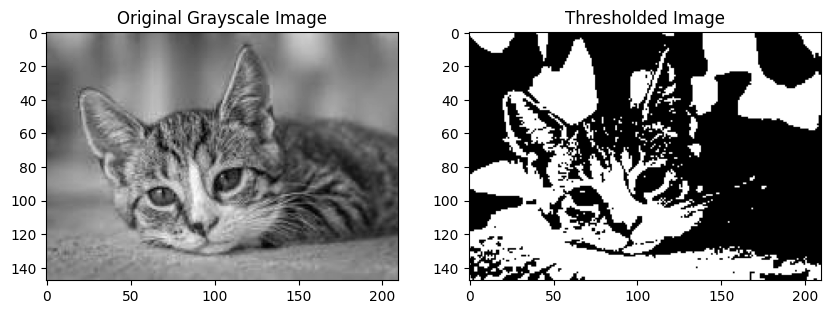

In [ ]:
# Step 1: Read the Image
gray_image = cv2.imread('cat.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Thresholding
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Step 3: Display Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.show()

### Inference:
The chosen thresholding method effectively seperated the light regions from the dark ones created an outline of the object in the image

## Task 3: Color-Based Segmentation

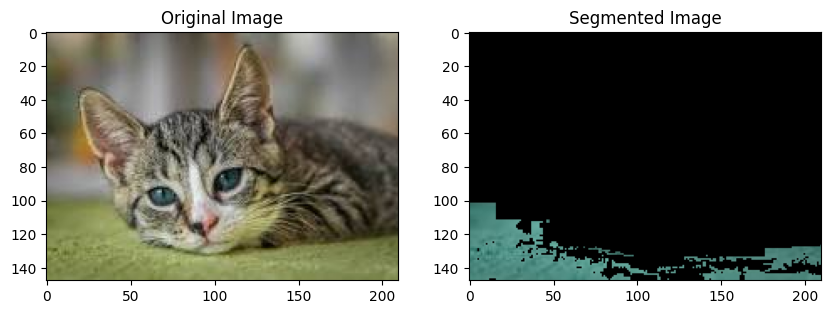

In [ ]:
# Step 1: Read the Image
color_image = cv2.imread('cat.jpeg')
image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Step 2: Convert to HSV
image_hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Step 3: Define color range for green and apply color thresholding
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
mask = cv2.inRange(image_hsv, lower_green, upper_green)
segmented_image = cv2.bitwise_and(color_image, color_image, mask=mask)

# Step 4: Display Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()


#### Color-Based Thresholding:
This technique allows for the separation of a specific color within an image. By applying this method, the selected color is effectively isolated from the rest of the image, making the areas with the target color stand out prominently.

# Assignment 1B
##  Task 1: Image Negative Transformation
**Objective:** Create an image negative using Python.

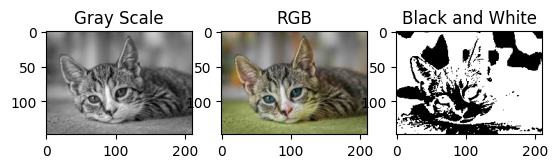

In [ ]:
img_bgr = cv2.imread('cat.jpeg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gs = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
(thresh, img_bw) = cv2.threshold(img_gs, 127, 255, cv2.THRESH_BINARY)
img_bw//=255
f = plt.figure()
f.add_subplot(1,3, 1)
plt.imshow(img_gs,cmap='gray')
plt.title('Gray Scale')
f.add_subplot(1,3, 2)
plt.imshow(img_rgb)
plt.title('RGB')
f.add_subplot(1,3, 3)
plt.imshow(img_bw,cmap='binary')
plt.title('Black and White')
plt.show(block=True)

In [ ]:
# Negative Transform
def negativeLT(img,bit):
    L = 2**bit
    return L-1-img

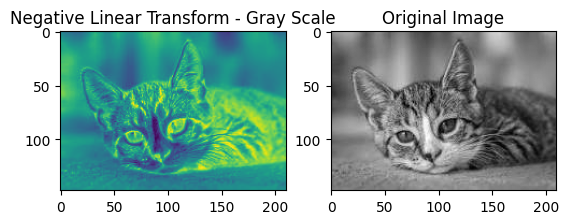

In [ ]:
# Load Gray Scale Image
img = img_gs
# Apply the image negative transformation.
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(negativeLT(img,8))
plt.title('Negative Linear Transform - Gray Scale')
f.add_subplot(1,2, 2)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.show(block=True)

### Inference:
The negative transformation of the image successfully reversed the pixel intensities, producing an inverted version of the original image. This technique is beneficial for improving contrast and revealing details within the image.

## Task 2: Gamma Correction
**Objective:** Apply gamma correction with different gamma values.

In [ ]:
def powerT(img,c,gamma):
    img = c*((img/255)**gamma)
    img = np.clip(img * 255.0, 0, 255)
    return np.int32(img)

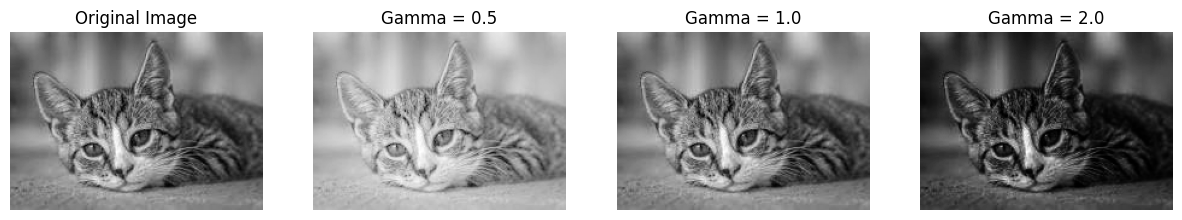

In [ ]:
# Load Gray Scale Image
img = img_gs
# Apply gamma correction with γ=0.5,γ=1.0,γ=2.0.
gamma_values = [0.5, 1.0, 2.0]
corrected_images = [powerT(img, 1, gamma) for gamma in gamma_values]
# Plot the original and corrected images
f, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
for i, (gamma, corrected_img) in enumerate(zip(gamma_values, corrected_images)):
    axs[i + 1].imshow(corrected_img, cmap='gray')
    axs[i + 1].set_title(f'Gamma = {gamma}')
    axs[i + 1].axis('off')
plt.show()

#### Inference for Gamma Correction:
Gamma correction allows for the adjustment of an image's brightness and contrast through varying gamma values. Lower gamma values (<1) brighten darker areas, while higher gamma values (>1) increase contrast and detail in lighter areas. By modifying the gamma value, you can fine-tune the overall brightness and contrast of an image to achieve the desired visual effect.

## Task 3: Log Transform
**Objective:** Apply log transformation to enhance an image.

In [ ]:
def LogT(img,c):
    img = img/255.0
    img = c*np.log(img+1)
    img = np.clip(img * 255.0, 0, 255)
    return np.int32(img)

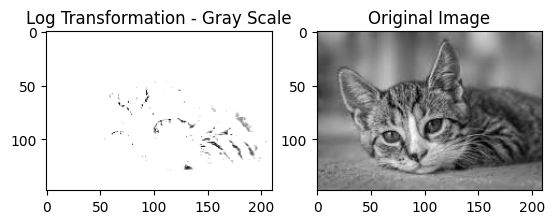

In [ ]:
# Load Gray Scale Image
img = img_gs
# Apply the Log transformation.
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(LogT(img,8), cmap='gray')
plt.title('Log Transformation - Gray Scale')
f.add_subplot(1,2, 2)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.show(block=True)


### Inference for Log Transformation:
Log transformation is effective for improving image contrast, particularly when pixel intensities are clustered within a narrow range. Applying this transformation spreads out the intensity values, leading to a visually enhanced image with better contrast and detail. It is especially useful for images with low contrast or a limited dynamic range.

##  Task 4: Compare Transformations
**Objective:** Compare the effects of different transformations.

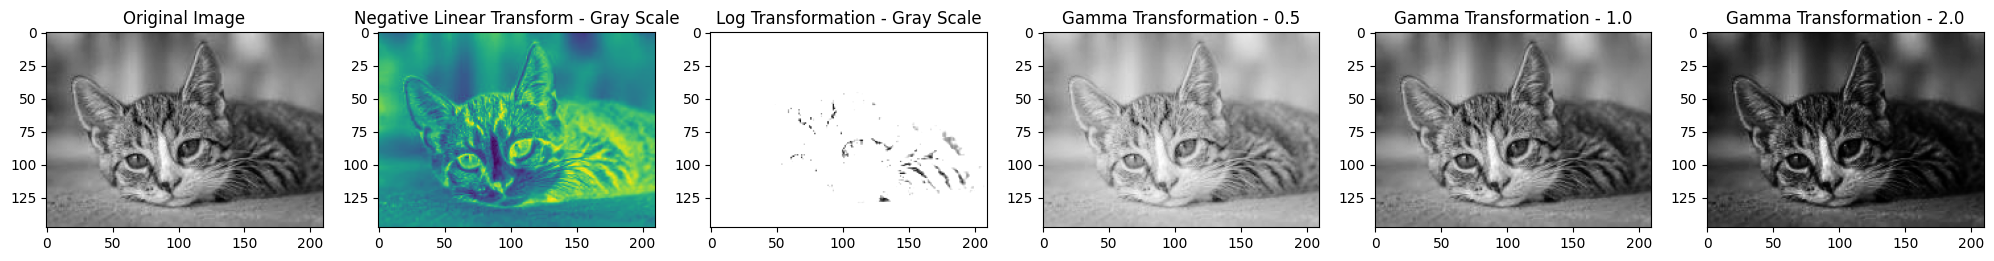

In [ ]:
# Load Gray Scale Image
img = img_gs

#Compare Transformations
plt.figure(figsize=(25, 5))
plt.subplot(1, 6, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 6, 2)
plt.imshow(negativeLT(img,8))
plt.title('Negative Linear Transform - Gray Scale')
plt.subplot(1, 6, 3)
plt.imshow(LogT(img,8), cmap='gray')
plt.title('Log Transformation - Gray Scale')
plt.subplot(1, 6, 4)
plt.imshow(corrected_images[0], cmap='gray')
plt.title('Gamma Transformation - 0.5')
plt.subplot(1, 6, 5)
plt.imshow(LogT(img,8))
plt.imshow(corrected_images[1], cmap='gray')
plt.title('Gamma Transformation - 1.0')
plt.subplot(1, 6, 6)
plt.imshow(corrected_images[2], cmap='gray')
plt.title('Gamma Transformation - 2.0')
plt.show()

### Comparing Transformations:
- **Image Negative:** Inverts the pixel intensities, creating a negative version of the image.
- **Gamma Correction:** Adjusts the brightness and contrast of an image by applying a power-law transformation with different gamma values.
- **Log Transformation:** Enhances the contrast of an image by spreading out the intensity values using the logarithmic function.

## Task 5: Apply Transformations to Color Images
**Objective:** Apply the transformations to a color image by processing each channel separately.

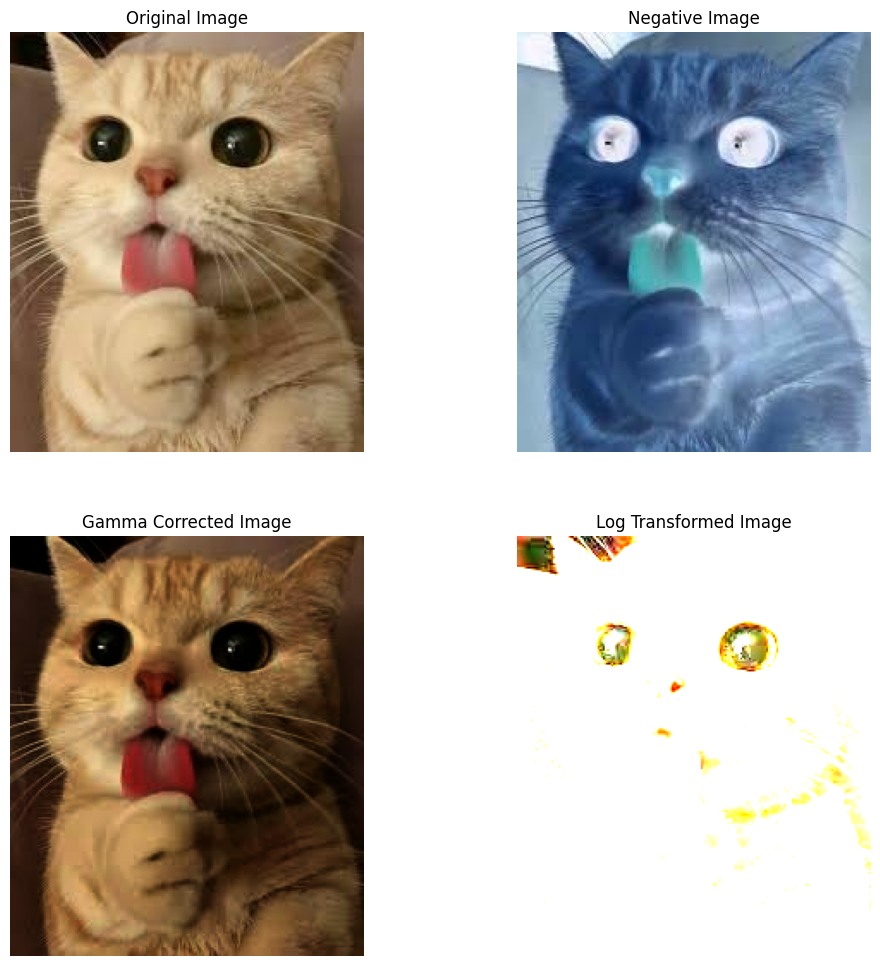

In [ ]:
# Load a color image
image = cv2.imread('cat1.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its R, G, and B channels
R, G, B = cv2.split(image_rgb)

# Apply transformations to each channel
R_neg = negativeLT(R,8)
G_neg = negativeLT(G,8)
B_neg = negativeLT(B,8)

R_gamma = powerT(R,1,2.0)
G_gamma = powerT(G,1,2.0)
B_gamma = powerT(B,1,2.0)

R_log = LogT(R,8)
G_log = LogT(G,8)
B_log = LogT(B,8)

# Merge the channels back together
image_neg = cv2.merge([R_neg, G_neg, B_neg])
image_gamma = cv2.merge([R_gamma, G_gamma, B_gamma])
image_log = cv2.merge([R_log, G_log, B_log])

# Display the original and the transformed images
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(image_neg)
axs[0, 1].set_title('Negative Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(image_gamma)
axs[1, 0].set_title('Gamma Corrected Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(image_log)
axs[1, 1].set_title('Log Transformed Image')
axs[1, 1].axis('off')

plt.show()

## *Assignment 1C*


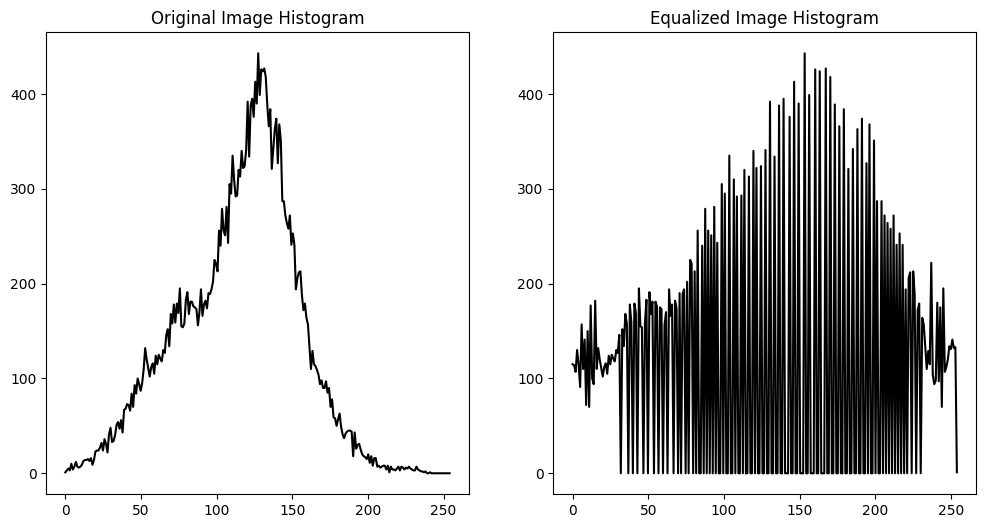

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image using PIL
image = Image.open('cat.jpeg').convert('L')
image_np = np.array(image)

# Step 1: Calculate the histogram
histogram, bin_edges = np.histogram(image_np, bins=256, range=(0, 255))

# Step 2: Calculate the Cumulative Distribution Function (CDF)
cdf = histogram.cumsum()
cdf_normalized = 255 * cdf / cdf[-1]  # Normalize to range [0, 255]

# Step 3: Apply histogram equalization
equalized_image_np = np.interp(image_np.flatten(), bin_edges[:-1], cdf_normalized).reshape(image_np.shape).astype(np.uint8)

# Convert numpy array back to an image
equalized_image = Image.fromarray(equalized_image_np)

# Step 4: Calculate the histogram of the equalized image
equalized_histogram, _ = np.histogram(equalized_image_np, bins=256, range=(0, 255))

# Step 5: Display results
plt.figure(figsize=(12, 6))

# Original Image Histogram
plt.subplot(1, 2, 1)
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Original Image Histogram")

# Equalized Image Histogram
plt.subplot(1, 2, 2)
plt.plot(bin_edges[0:-1], equalized_histogram, color='black')
plt.title("Equalized Image Histogram")

plt.show()

### Inference:
Histogram equalization is a method for improving image contrast by spreading pixel intensities across the entire range. By equalizing the histogram, the image's visual appeal is enhanced, resulting in a more vibrant and detailed appearance. This technique is especially effective for images with low contrast or a restricted dynamic range.

#### **Task2: Comparing Histogram Equlization techniques**

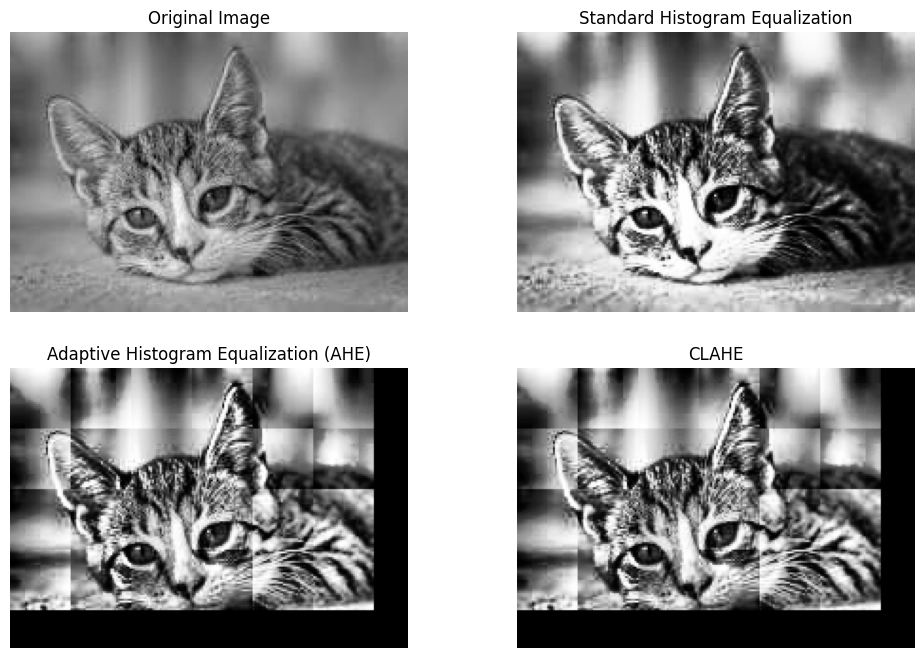

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = Image.open('cat.jpeg').convert('L')
image_np = np.array(image)

# 1. Standard Histogram Equalization (as implemented before)
def standard_hist_eq(image_np):
    histogram, bin_edges = np.histogram(image_np, bins=256, range=(0, 255))
    cdf = histogram.cumsum()
    cdf_normalized = 255 * cdf / cdf[-1]
    equalized_image_np = np.interp(image_np.flatten(), bin_edges[:-1], cdf_normalized).reshape(image_np.shape)
    return equalized_image_np.astype(np.uint8)

# 2. Adaptive Histogram Equalization (AHE)
def adaptive_hist_eq(image_np, tile_size=8):
    height, width = image_np.shape
    output_image = np.zeros_like(image_np)

    # Calculate the number of tiles
    tiles_x = width // tile_size
    tiles_y = height // tile_size

    for i in range(tiles_y):
        for j in range(tiles_x):
            # Extract the tile
            x_start = j * tile_size
            y_start = i * tile_size
            tile = image_np[y_start:y_start + tile_size, x_start:x_start + tile_size]

            # Apply histogram equalization to the tile
            tile_eq = standard_hist_eq(tile)

            # Place the equalized tile back into the output image
            output_image[y_start:y_start + tile_size, x_start:x_start + tile_size] = tile_eq

    return output_image

# 3. Contrast Limited Adaptive Histogram Equalization (CLAHE)
def clahe(image_np, tile_size=8, clip_limit=40):
    height, width = image_np.shape
    output_image = np.zeros_like(image_np)

    # Calculate the number of tiles
    tiles_x = width // tile_size
    tiles_y = height // tile_size

    for i in range(tiles_y):
        for j in range(tiles_x):
            # Extract the tile
            x_start = j * tile_size
            y_start = i * tile_size
            tile = image_np[y_start:y_start + tile_size, x_start:x_start + tile_size]

            # Compute histogram
            histogram, bin_edges = np.histogram(tile, bins=256, range=(0, 255))

            # Clip histogram values to limit contrast
            excess_pixels = histogram[histogram > clip_limit] - clip_limit
            histogram[histogram > clip_limit] = clip_limit
            histogram += excess_pixels.sum() // 256  # Redistribute excess pixels

            # Calculate CDF and apply equalization
            cdf = histogram.cumsum()
            cdf_normalized = 255 * cdf / cdf[-1]
            tile_clahe = np.interp(tile.flatten(), bin_edges[:-1], cdf_normalized).reshape(tile.shape)

            # Place the equalized tile back into the output image
            output_image[y_start:y_start + tile_size, x_start:x_start + tile_size] = tile_clahe

    return output_image

# Apply the three methods
standard_eq_image = standard_hist_eq(image_np)
ahe_image = adaptive_hist_eq(image_np, tile_size=32)
clahe_image = clahe(image_np, tile_size=32, clip_limit=40)

# Display the results side by side
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(standard_eq_image, cmap='gray')
plt.title("Standard Histogram Equalization")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(ahe_image, cmap='gray')
plt.title("Adaptive Histogram Equalization (AHE)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(clahe_image, cmap='gray')
plt.title("CLAHE")
plt.axis('off')

plt.show()


### Inference for Histogram Equalization Techniques:
- **Global Histogram Equalization:**This method improves the overall contrast of the image by redistributing pixel intensities across the entire intensity range. It is effective for enhancing both contrast and brightness throughout the entire image.

- **CLAHE (Contrast Limited Adaptive Histogram Equalization):** An advanced version of adaptive histogram equalization, CLAHE controls the extent of contrast enhancement in each region to avoid excessive noise and artifacts. It is particularly useful for images with high dynamic range and fluctuating lighting conditions, resulting in a more balanced and visually pleasing enhancement.

- **Adaptive Histogram Equalization:** This technique applies histogram equalization to smaller regions of the image separately. It is beneficial for images with varying lighting conditions or specific areas of interest, as it allows for more localized contrast enhancement.



#### **Task3: Implementing histogram equalization on color images**

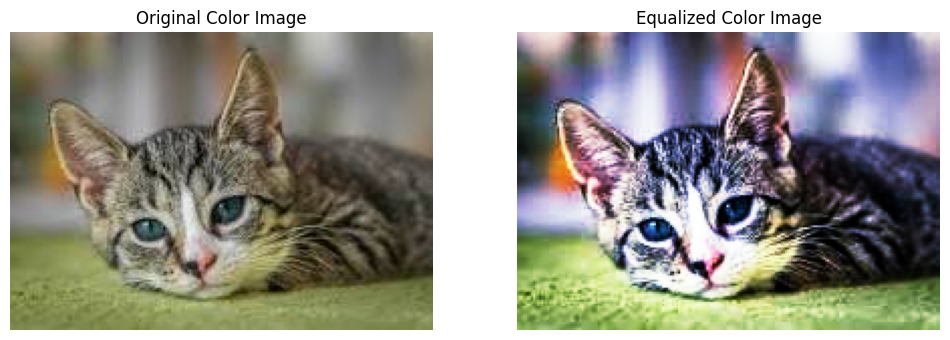

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load color image
image = Image.open('cat.jpeg')
image_np = np.array(image)

# Step 1: Separate the color channels
red_channel, green_channel, blue_channel = image_np[:, :, 0], image_np[:, :, 1], image_np[:, :, 2]

# Function for histogram equalization on a single channel
def histogram_equalization(channel):
    histogram, bin_edges = np.histogram(channel, bins=256, range=(0, 255))
    cdf = histogram.cumsum()
    cdf_normalized = 255 * cdf / cdf[-1]
    equalized_channel = np.interp(channel.flatten(), bin_edges[:-1], cdf_normalized).reshape(channel.shape)
    return equalized_channel.astype(np.uint8)

# Step 2: Apply histogram equalization to each channel
red_eq = histogram_equalization(red_channel)
green_eq = histogram_equalization(green_channel)
blue_eq = histogram_equalization(blue_channel)

# Step 3: Reconstruct the color image by combining the equalized channels
equalized_image_np = np.stack((red_eq, green_eq, blue_eq), axis=2)
equalized_image = Image.fromarray(equalized_image_np)

# Step 4: Display the original and equalized color images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Color Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Color Image")
plt.axis('off')

plt.show()

#### **Task4: Histogram equalization in different applications**

Text(0.5, 1.0, 'Equalized Image')

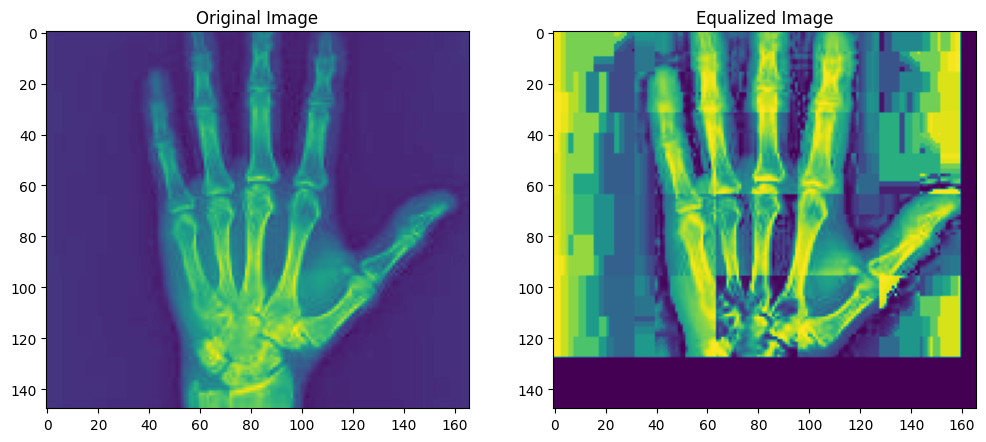

In [5]:
image = Image.open("xray.jpeg").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = adaptive_hist_eq(image_np,32)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Image")



### Inference for Applications of Histogram Equalization in Medical Imaging:
- **Improving Image Contrast:** Histogram equalization can enhance the contrast of medical images, making it easier to discern structures and detect abnormalities. By redistributing pixel intensities, this technique brings out finer details and features, which supports more accurate diagnosis and analysis.

Text(0.5, 1.0, 'Equalized Image')

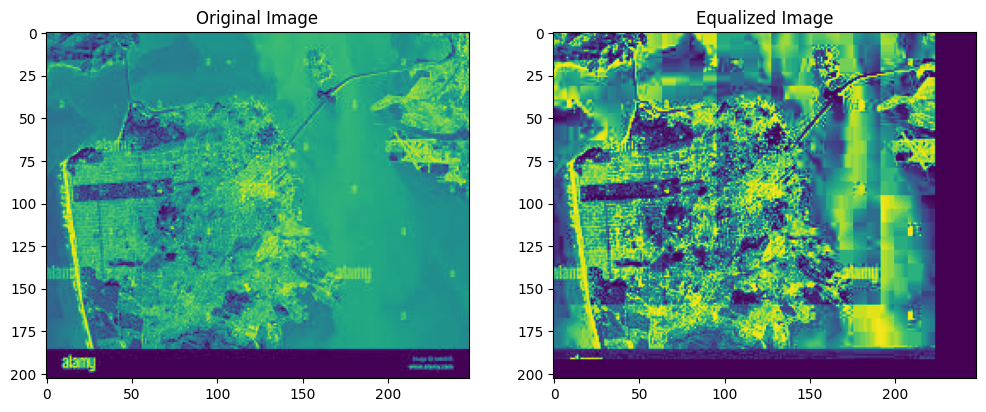

In [8]:
image = Image.open("sat.jpeg").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = clahe(image_np,32,40)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Image")


### Inference for Applications of Histogram Equalization in Satellite Imaging:
- **Enhancing Image Quality:** Histogram equalization can boost the quality of satellite images by improving contrast and making ground features more visible. This enhancement is beneficial for applications like land cover classification, object detection, and environmental monitoring, where clear and detailed images are crucial.




Text(0.5, 1.0, 'Equalized Image')

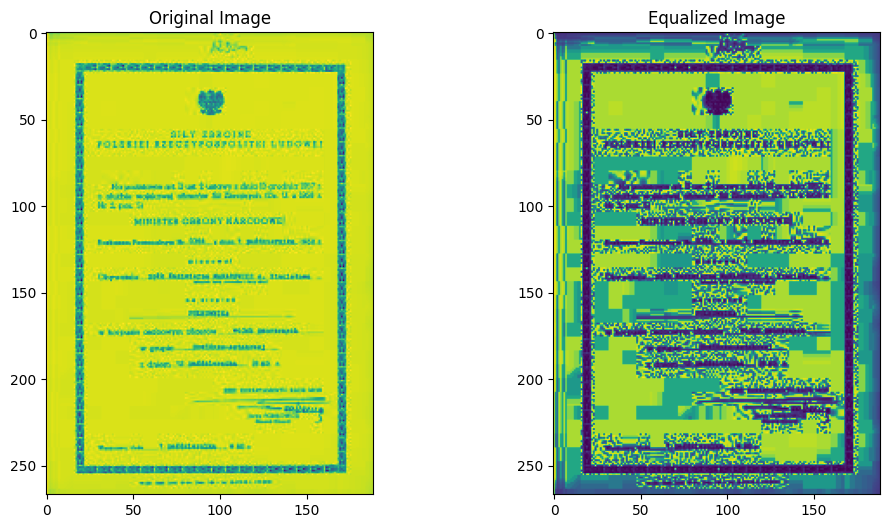

In [9]:
image = Image.open("docu.jpeg").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = standard_hist_eq(image_np)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Image")


### Inference for Applications of Histogram Equalization in Document Imaging:
- **Improving Text Readability:** Histogram equalization can enhance the readability of text in document images by increasing the contrast between the text and its background. By adjusting the histogram, the text becomes more distinct and easier to read, which is advantageous for optical character recognition (OCR) and document analysis.

Text(0.5, 1.0, 'Equalized Image')

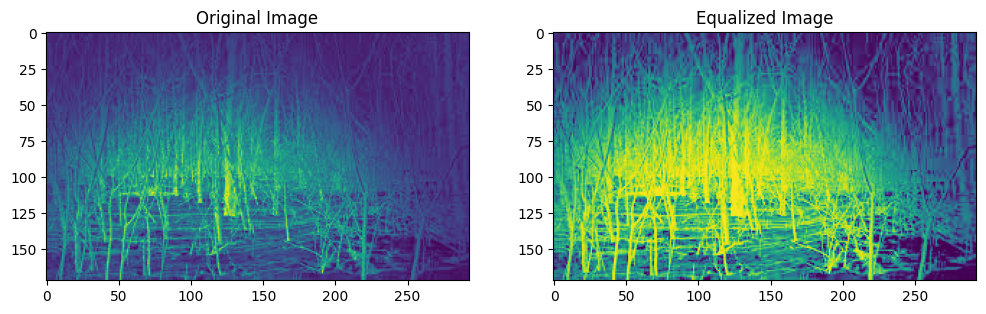

In [10]:
image = Image.open("night.jpeg").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = standard_hist_eq(image_np)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Image")


### Inference for Applications of Histogram Equalization in nightvision images:
- **Enhancing Low-Light Visibility:** Histogram equalization can improve the visibility of objects in low-light or night vision images by increasing the contrast and brightness. By redistributing the pixel intensities, you can reveal details that may be hidden in dark regions, making it easier to detect objects and navigate in low-light conditions.

Text(0.5, 1.0, 'Equalized Image')

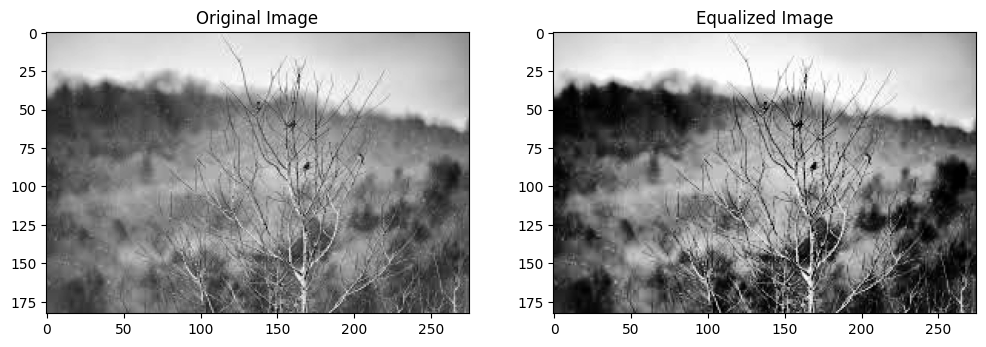

In [11]:
image = Image.open("lowcontrast.jpeg").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = standard_hist_eq(image_np)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np, cmap='gray')
plt.title("Equalized Image")


### Inference for Low Contrast Images:
Histogram equalization is especially useful for improving the contrast in low contrast images by redistributing pixel intensities across the entire intensity range. This process reveals details and features that might be obscured in dark or bright areas, resulting in an image with enhanced contrast and clarity.

#### **Task6: Multi-scale Histogram Equalization**

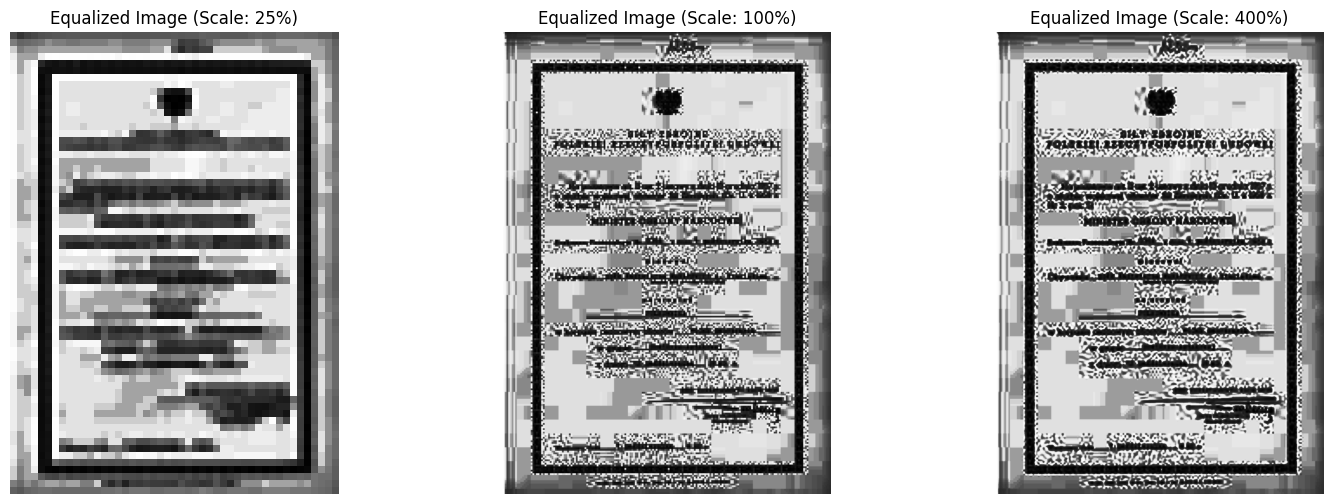

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and convert to grayscale
image = Image.open('docu.jpeg').convert('L')
image_np = np.array(image)

# Rescale the image to different scales
scales = [0.25, 1.0, 4.0]  # 25%, 100%, 400%
rescaled_images = [image.resize((int(image.width * scale), int(image.height * scale))) for scale in scales]

# Apply histogram equalization to each rescaled image
equalized_images = [Image.fromarray(standard_hist_eq(np.array(img))) for img in rescaled_images]

# Display the original and equalized images at different scales
plt.figure(figsize=(18, 6))

for i, (scale, eq_image) in enumerate(zip(scales, equalized_images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(eq_image, cmap='gray')
    plt.title(f"Equalized Image (Scale: {int(scale*100)}%)")
    plt.axis('off')

plt.show()


### Smaller Scales (25%):
When resizing the image to a smaller scale, histogram equalization may lead to a loss of detail. The lower resolution can obscure fine features, and the equalization might overly enhance some areas.

### Original Scale (100%):
At the original scale, histogram equalization typically functions as intended, improving contrast while maintaining most of the image details.

### Larger Scales (400%):
Enlarging the image provides more space for detail enhancement, but it can result in a more subtle contrast improvement. The spread of pixel intensities becomes broader, potentially diminishing the perceived enhancement.

#### **Task7: Histogram equalization for Image enhancement**

Text(0.5, 1.0, 'Equalized Image')

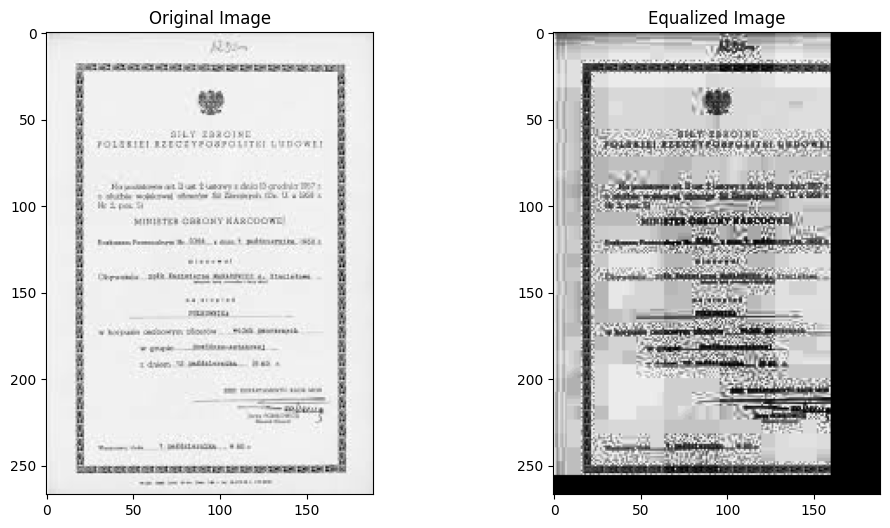

In [13]:
image = Image.open("docu.jpeg").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = clahe(image_np,32,40)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np, cmap='gray')
plt.title("Equalized Image")


Text(0.5, 1.0, 'Enahanced Image')

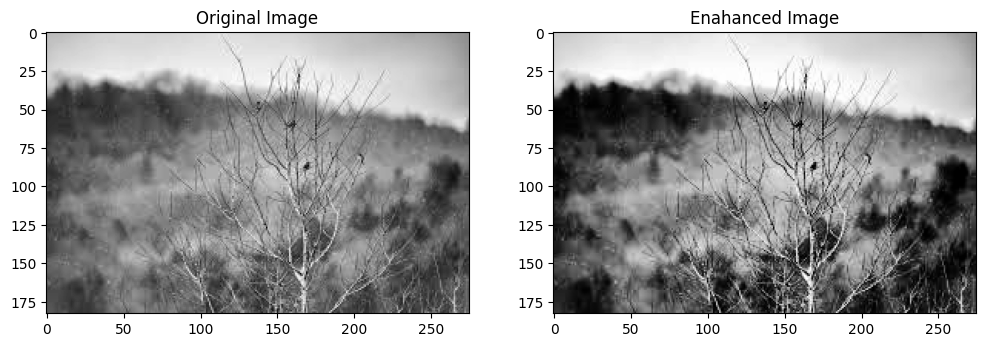

In [14]:
image = Image.open("lowcontrast.jpeg").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = standard_hist_eq(image_np)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np, cmap='gray')
plt.title("Enahanced Image")


Histogram equalization improves the readability of text in the image by enhancing its contrast. It also refines the background, resulting in a more visually appealing image that is better suited for analysis or presentation.

Text(0.5, 1.0, 'Histogram Equalization')

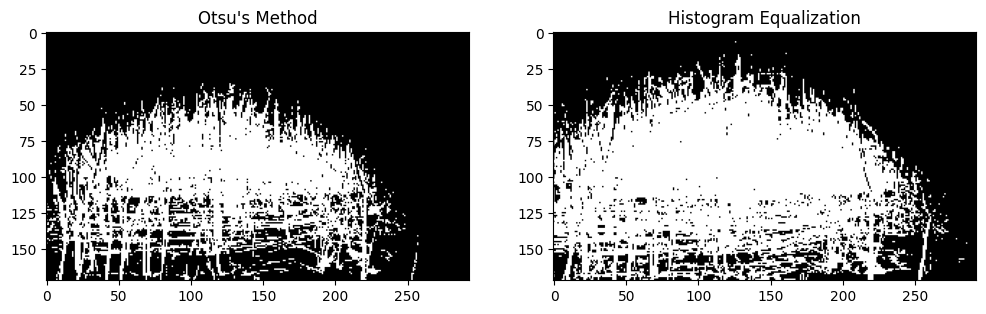

In [15]:
image = Image.open("night.jpeg").convert('L')
image_np = np.array(image)

#Applying segmentation using otsu's method
_, thresholded_image = cv2.threshold(image_np, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresholded_image = Image.fromarray(thresholded_image)

#Applying segmentation using histogram equalization
equalized_image_np = standard_hist_eq(image_np)
_, equalized_image = cv2.threshold(equalized_image_np, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
equalized_image = Image.fromarray(equalized_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Otsu's Method")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalization")

### Inference for Image Segmentation:
Histogram equalization aids image segmentation by boosting contrast between various regions of the image. By equalizing the histogram, the distinction between objects and their backgrounds is enhanced, making it simpler to differentiate regions based on intensity levels. This approach is beneficial for tasks such as object detection, feature extraction, and image analysis.

Applying thresholding after histogram equalization can further refine the segmentation by isolating specific areas of interest according to intensity values. This combination of histogram equalization and thresholding improves the clarity of boundaries between objects and background, allowing for more effective extraction of information from distinct regions.



